Выполнил: Лейман М.А.  

Дата создания: 09.02.2025

# Машинное обучение. KNN,  Метрики.

## Задание 1
Введение в машинное обучение.
KNN. Метрики качества. Матрица ошибок.
Виды данных (числовые / категориальные

#### Просмотр загруженного датасета

In [1]:
!ls dataset

ls: невозможно получить доступ к 'dataset': Нет такого файла или каталога


In [5]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!which python 

/home/maksim/anaconda3/envs/myenv/bin/python


### Импорты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### 1. Загрузка данных

In [4]:
# Загружаем данные
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

### Просмотр данных

In [6]:
# Просмотр данных
print("Train dataset:")
print(df_train.info())
print("\nпервые сторки:")
print(df_train.head())


Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None

первые сторки:
   id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1


### 2. Анализ EDA

In [14]:
# EDA: анализ переменных
eda_stats = df_train.describe().T
eda_stats['Пропуски'] = df_train.isnull().sum()
eda_stats['Медиана'] = df_train.quantile(0.5)
eda_stats['Дисперсия'] = df_train.var()
eda_stats['Квантиль_0.1'] = df_train.quantile(0.1)
eda_stats['Квантиль_0.9'] = df_train.quantile(0.9)
eda_stats['Квартиль_1'] = df_train.quantile(0.25)
eda_stats['Квартиль_3'] = df_train.quantile(0.75)
print("\nEDA Резюме:")
print(eda_stats)


EDA Резюме:
         count        mean         std      min      25%      50%      75%  \
id       414.0  206.500000  119.655756    0.000  103.250  206.500  309.750   
gravity  414.0    1.017894    0.006675    1.005    1.012    1.018    1.022   
ph       414.0    5.955459    0.642260    4.760    5.530    5.740    6.280   
osmo     414.0  651.545894  234.676567  187.000  455.250  679.500  840.000   
cond     414.0   21.437923    7.514750    5.100   15.500   22.200   27.600   
urea     414.0  278.657005  136.442249   10.000  170.000  277.000  385.000   
calc     414.0    4.114638    3.217641    0.170    1.450    3.130    6.630   
target   414.0    0.444444    0.497505    0.000    0.000    0.000    1.000   

             max  Пропуски  Медиана     Дисперсия  Квантиль_0.1  Квантиль_0.9  \
id        413.00         0  206.500  14317.500000        41.300       371.700   
gravity     1.04         0    1.018      0.000045         1.008         1.025   
ph          7.94         0    5.740      

### 3. Для целевой переменной target посчитать долю 1

In [17]:
# Доля 1 в целевой переменной
target_ratio = df_train['target'].mean()
print(f"\nДоля 1 в target: {target_ratio:.2%}")



Доля 1 в target: 44.44%


### 4. Графики

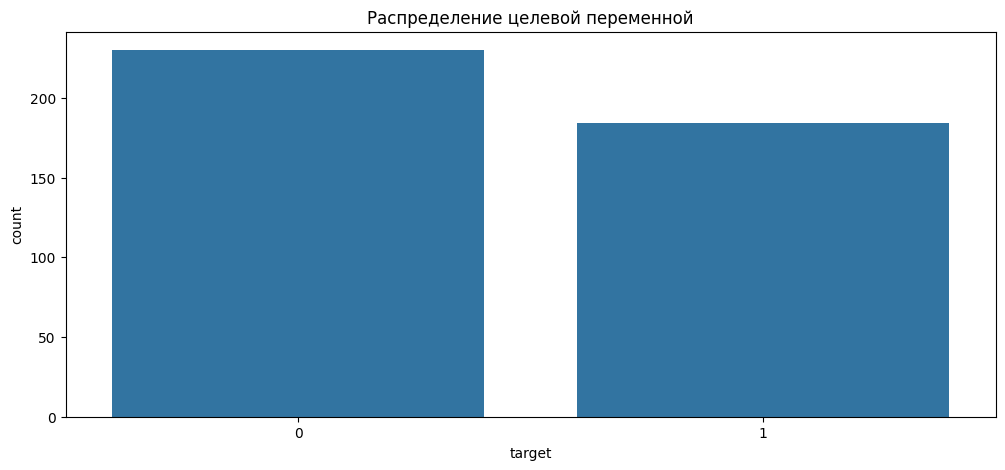

In [18]:
# Графики
plt.figure(figsize=(12, 5))
sns.countplot(x=df_train['target'])
plt.title("Распределение целевой переменной")
plt.show()

### 5. Обучение модели KNN

In [21]:
# Разделение данных
X = df_train.drop(columns=['target'])
y = df_train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [24]:
# Подбор k и обучение модели
best_k = 1
best_score = 0
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    if score > best_score:
        best_k = k
        best_score = score

print(f"\nЛучший k: {best_k} с точностью {best_score:.4f}")


Лучший k: 19 с точностью 0.8193


In [25]:
# Обучение финальной модели
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)


Метрики качества:
Accuracy: 0.4940
Precision: 0.4138
Recall: 0.3243
F1-score: 0.3636
ROC AUC: 0.4774


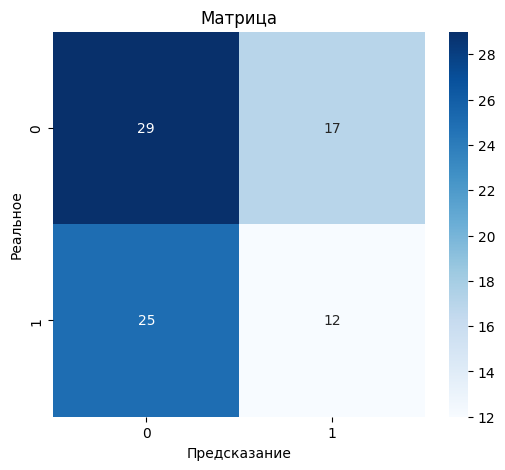

In [30]:
# Оценка качества
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print("\nМетрики качества:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Предсказание")
plt.ylabel("Реальное")
plt.title("Матрица")
plt.show()

#### Сбалансированные классы 

In [ ]:

# Подсчитаем количество классов 0 и 1
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

print(f"Количество  1: {len(df_class_1)}")
print(f"Количество  0: {len(df_class_0)}")

# Найдем минимальное количество для классов 0 и 1
min_class_size = min(len(df_class_0), len(df_class_1))
print(f"Минимальное количество: {min_class_size}")


# Обрезаем лишние 0, чтобы сделать баланс между классами
df_class_0_balanced = df_class_0[:min_class_size]
df_class_1_balanced = df_class_1

# Объединяем сбалансированные данные (классы 0 и 1)
df_balanced = pd.concat([df_class_0_balanced, df_class_1_balanced])

# Разделяем на тренировочную и тестовую выборки (80% для тренировки и 10% для теста)
X = df_balanced.drop(columns=['target'])
y = df_balanced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print(f"Длина train: {len(y_train)}")
print(f"Длина test {len(y_test)}")

# Добавляем оставшиеся 0 в тестовую выборку
df_class_0_remaining = df_class_0[min_class_size:]
print(f"Длина df_class_0_remaining {len(df_class_0_remaining)}")
# Объединяем остаточные данные класса 0 с тестовой выборкой
X_test = pd.concat([X_test, df_class_0_remaining.drop(columns=['target'])])
y_test = pd.concat([y_test, df_class_0_remaining['target']])
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")


# Печатаем размерности выборок
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")

# Проверим, сколько классов в тренировочной и тестовой выборках
print(f"Доля 1 в тренировочной выборке: {y_train.mean()}")
print(f"Доля 1 в тестовой выборке: {y_test.mean()}")


Количество  1: 184
Количество  0: 230
Минимальное количество: 184
Длина train: 331
Длина test 37
Длина df_class_0_remaining 46
Размер X_train: (331, 7)
Размер X_test: (83, 7)
Размер X_train: (331, 7)
Размер X_test: (83, 7)
Доля 1 в тренировочной выборке: 0.5015105740181269
Доля 1 в тестовой выборке: 0.21686746987951808


In [50]:
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Лучший k: 2 с точностью 0.7108

Метрики качества:
Accuracy: 0.7108
Precision: 0.3929
Recall: 0.6111
F1-score: 0.4783
ROC AUC: 0.6748


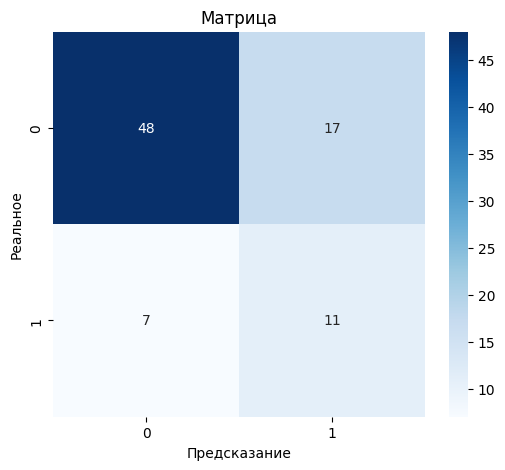

In [53]:


# Подбор k и обучение модели
best_k = 1
best_score = 0
for k in range(1, 23):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print(f"\nЛучший k: {best_k} с точностью {best_score:.4f}")

# Обучение финальной модели
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Оценка качества
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)



print("\nМетрики качества:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Предсказание")
plt.ylabel("Реальное")
plt.title("Матрица")
plt.show()